<a href="https://colab.research.google.com/github/shhuangmust/AI/blob/110-2/11.pmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PMI (Pointwise Mutual Information)
- PMI是利用分散式表示法，表達字詞意思的其中一種
- 分散的定義，就是一個詞並非本身所決定，是「分散在其旁」的其它元素所決定
- PMI則是計算那些字比較容易一起出現
- 例如：在新聞報導中，有"New"，"York"這兩個字一起出現，代表一個地名，所以當出現了New這個字，則有可能出現York，這個可能性就是計算其PMI
- 下面的範例，則是給定一個M擁有十個字詞，每個字詞與其他字詞的出現次數統計，然後去計算其PMI
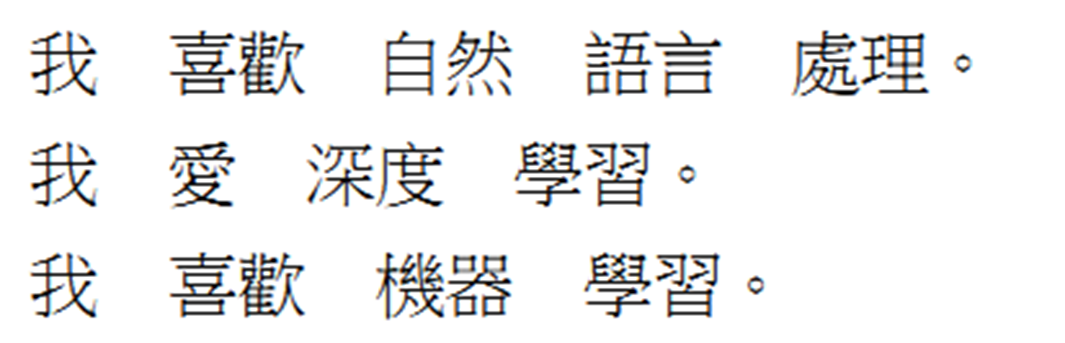
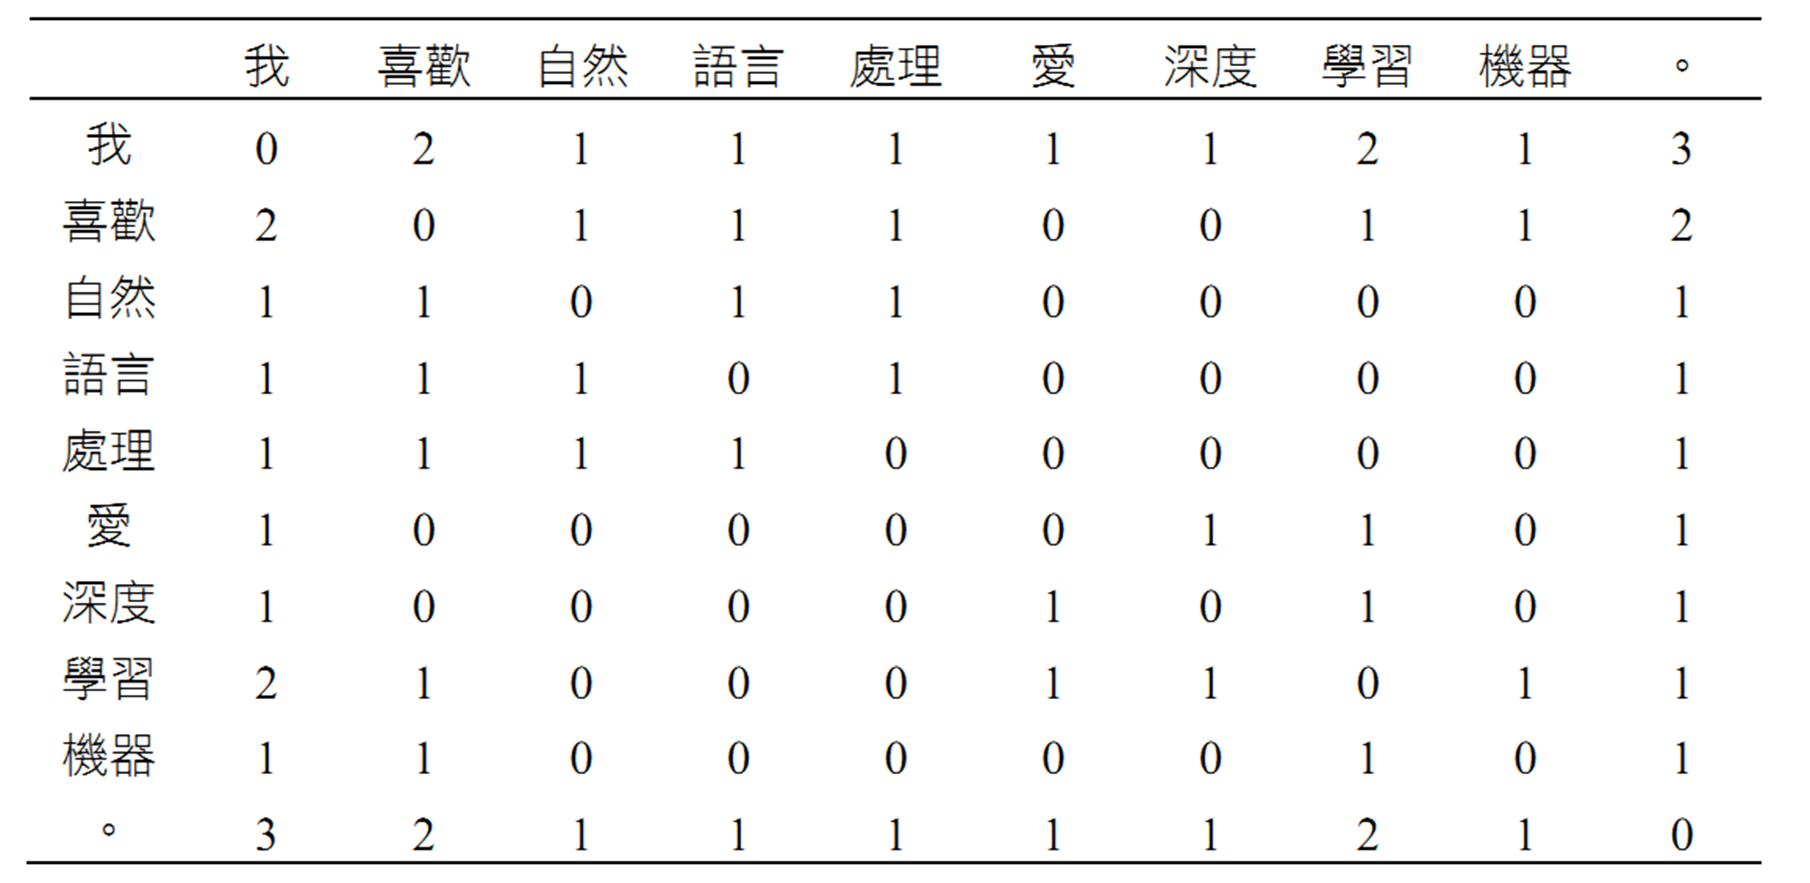

In [ ]:
import numpy as np

M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

M_pmi = pmi(M)
np.set_printoptions(precision=2)
print(M_pmi)

[[0.   0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.22]
 [0.18 0.   0.44 0.44 0.44 0.   0.   0.   0.66 0.18]
 [0.07 0.44 0.   1.03 1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 0.   1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 1.03 0.   0.   0.   0.   0.   0.07]
 [0.3  0.   0.   0.   0.   0.   1.48 0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   1.48 0.   0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   0.78 0.78 0.   0.78 0.3 ]
 [0.3  0.66 0.   0.   0.   0.   0.   0.78 0.   0.3 ]
 [0.22 0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.  ]]
